In [1]:
print(__doc__)

# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# #############################################################################
# Create the data

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))
y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm
# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]
    
 # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)
    
    ax = Axes3D(fig, rect=[0, 0, .95, 1]
    pca = PCA(n_components = 3) # Choose number of components
    
    
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()   

SyntaxError: invalid syntax (<ipython-input-1-746836b0939c>, line 55)

How to Implement Principal Component Analysis Practically using Python.?

1. Standardize the data. (with mean =0 and variance = 1)
2. Compute the Covariance matrix of dimensions.
3. Obtain the Eigenvectors and Eigenvalues from the covariance matrix (we can also use correlation matrix or even Single value decomposition, however in this video will focus on covariance matrix).
4. Sort eigenvalues in descending order and choose the top k Eigenvectors that correspond to the k largest eigenvalues (k will become the number of dimensions of the new feature subspace k≤d, d is the number of original dimensions).
5. Construct the projection matrix W from the selected k Eigenvectors.
6. Transform the original data set X via W to obtain the new k-dimensional feature subspace Y.

The core principle of the principal component analysis ( PCA) is to reduce to the maximum extent the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while sustaining the variance present in the dataset.

Dimensionality: It is the number of random variables in a dataset or simply the number of features, or rather more simply, the number of columns present in your dataset.

Correlation: It shows how strongly two variable are related to each other. The value of the same ranges for -1 to +1. Positive indicates that when one variable increases, the other increases as well, while negative indicates the other decreases on increasing the former. And the modulus value of indicates the strength of relation.

Orthogonal:  Uncorrelated to each other, i.e., correlation between any pair of variables is 0

Eigenvectors:  Eigenvectors and Eigenvalues are in itself a big domain, let’s restrict ourselves to the knowledge of the same which we would require here. So, consider a non-zero vector v. It is an eigenvector of a square matrix A, if Av is a scalar multiple of v. 
Av = ƛv
Here, v is the eigenvector and ƛ is the eigenvalue associated with it.

Dimensionality Reduction,Python Programming and Linear Algebra are used in PCA Algorithm using Machine Learning. Dimensions are nothing but features that represent the data. 

We will mainly apply PCA - Principal Component Analysis in Python using Machine Learning Library Scikit Learn on the two use-cases:
●Data Visualization
●Speeding ML algorithm

One important thing to note about Principal Component Analysis PCA is that it is an Unsupervised Machine Learning Dimensionality Reduction Technique, you can cluster the similar data points based on the feature correlation between them without any supervision (or labels, Dependent Variable) , and you will learn how to achieve this practically using Python with Machine Learning using Scikit Learn

What is a step-by-step explanation of principal component analysis?
In this video,  I’m providing step by step flow of PCA Principal Component Analysis practically

You guys might have many questions in your mind regarding Principal Component Analysis PCA in Machine Learning
What is principal component analysis and how many variables can be used for PCA?
What is principal component analysis? What are its key properties, and when is it useful? 
What does PCA (principal component Analysis) intuitively mean?
What is the main purpose of the principal component analysis of PCA?
How does principal component analysis work?
What are the mathematics of principal component analysis?
What are the main differences between a principal component analysis and a factor analysis?
For which cases is it not preferable to use principal component analysis (PCA)?
What are the practical applications of Principal component Analysis?
When is it better to apply principal component analysis (PCA) than multidimensional scaling?

In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

In [5]:
X.shape

(1797, 64)

In [7]:
import matplotlib.pyplot as plt

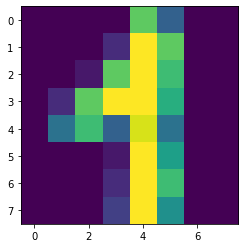

In [8]:
plt.imshow(images[42])

In [9]:
from sklearn.ensemble import IsolationForest

In [10]:
model = IsolationForest(random_state=0, contamination=0.02)


In [11]:
model.fit(X)

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.02,
                max_features=1.0, max_samples='auto', n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [12]:
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
outliers = model.predict(X)==-1

In [14]:
outliers

array([False, False, False, ..., False, False, False])

Text(0.5, 1.0, '2')

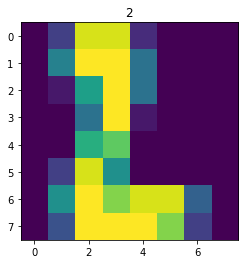

In [20]:
plt.imshow(images[outliers][13])
plt.title(y[outliers][13])